In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn


In [5]:
data = pd.read_csv('../My Data Science Projects/BW Reservations/BW_bookings_2021-present.csv', index_col=0)
data

,is_canceled,num_of_nights,Rate,Override,is_repeated_guest,booking_to_arrival_duration,month_of_arrival,day_of_arrival,day_of_booking,weekday_of_arrival,weekday_of_booking,month_of_booking,previous_stays,previous_cancellations
21550,0,4,97.01,97.01,0,44,6,9,26,3,1,1,0,0
32408,0,1,279.00,279.00,0,45,2,4,21,5,2,2,0,0
21486,0,1,90.40,90.40,0,1,6,7,6,1,0,0,0,0
11061,0,2,139.00,139.00,0,29,11,3,5,3,2,2,0,0
7958,0,3,179.00,179.00,0,17,1,13,27,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30189,1,1,169.00,169.00,1,8,11,11,3,5,4,4,0,0
30190,0,1,169.00,169.00,1,4,11,11,7,5,1,1,0,0
7890,0,1,97.30,100.43,0,30,1,12,13,2,0,0,0,0
1533,0,2,108.90,0.00,1,0,11,1,1,0,0,0,0,0


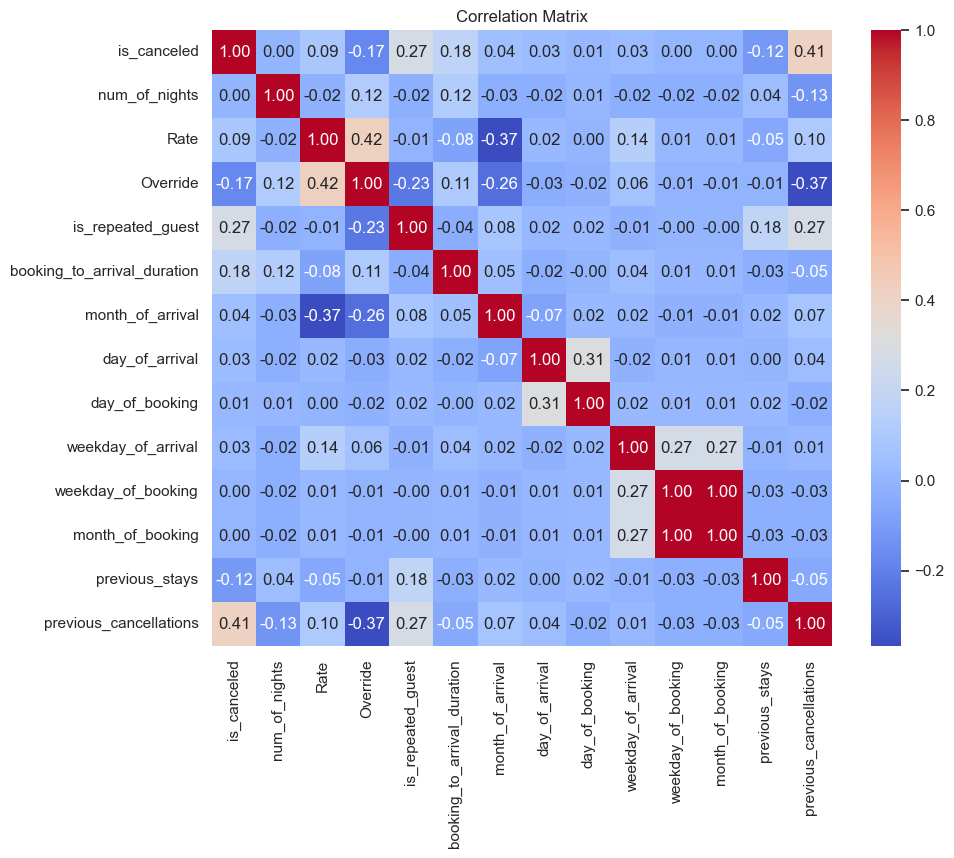

In [6]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Correlation Matrix Interpretation

This correlation matrix illustrates the relationships between various booking-related variables, including booking timings, guest details, and cancellation status. Below are key observations:

### Diagonal Elements
- All diagonal elements have a correlation of `1.00`, indicating perfect correlation with themselves.

### Correlations with `is_canceled`
- **Positive Correlations**:
  - `previous_cancellations` shows a correlation of `0.41` with `is_canceled`, suggesting a higher likelihood of cancellation with an increase in previous cancellations.
  - `weekday_of_arrival` has a correlation of `0.27` with `is_canceled`, indicating that cancellations might vary by the day of the week on which the arrival falls.
  
- **Negative Correlations**:
  - `Rate` and `booking_to_arrival_duration` both show a negative correlation of `-0.17` with `is_canceled`, hinting that higher rates or longer planning periods might reduce cancellation likelihood.

### High Correlations Among Other Variables
- `weekday_of_booking` and `weekday_of_arrival` are perfectly correlated (`1.00`), likely reflecting consistent booking behaviors through the week.
- `previous_stays` and `previous_cancellations` are strongly correlated (`0.41`), suggesting that frequent guests might also frequently cancel.

### Weak Correlations
- Many variables such as `month_of_booking` vs. `day_of_arrival` show negligible correlations, indicating no linear relationship between these variables.

### Implications for Predictive Modeling
- Variables with higher absolute correlation values with `is_canceled` might be more impactful in predicting cancellations and should be prioritized in the model.
- Variables with very low correlations could be considered for removal to simplify the model without significantly affecting predictive accuracy.

This matrix is crucial for identifying influential features and guiding further analytical or model refinement efforts.
